In [1]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, ReLU
import numpy as np
import os
import sys
from six.moves import cPickle
import tensorflow as tf
import matplotlib.pyplot as plt

# hyper parameter
batch_size = 32
num_classes = 100
epochs = 30

# 데이터 총 개수 : 40000개
# 클래스 개수 : 100개, 클래스 별 400개 이미지

steps_per_epoch = int(40000/batch_size)
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model.h5'

In [2]:
import sklearn.model_selection as sk

def load_data():
    path = './data'

    fpath = os.path.join(path, 'train_data')
    
    with open(fpath, 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
        
    X_train = d['data']
    y_train = d['labels']
    y_train = np.reshape(y_train, (len(y_train), 1))

    return X_train, y_train

x_train, y_train = load_data()

# x_train : total img dataset
# y_train : total label datset


# test, train dataset 분류하기 
X_train, X_test, y_train, y_test = sk.train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)


(26800, 32, 32, 3) uint8
(26800, 1) int64
(13200, 32, 32, 3) uint8
(13200, 1) int64


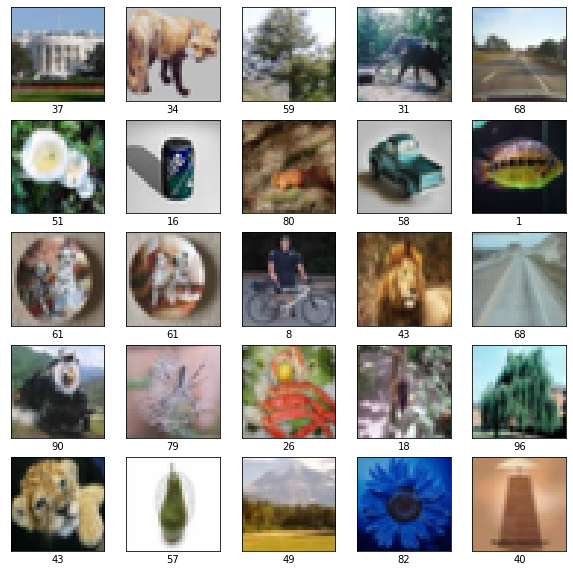

In [31]:
# understand data
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

# check data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

In [3]:
# data augmentation

# Basic preprocessing

X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

# one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

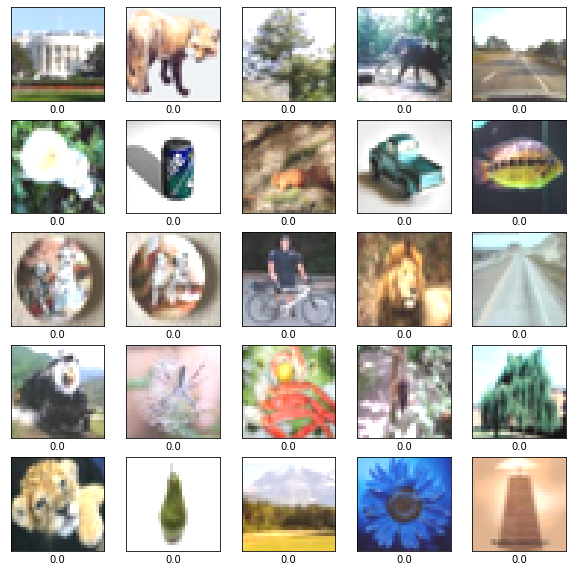

In [4]:
# image data preprocessing1: brightness

X_train = tf.image.random_brightness(
    X_train, 0.5, seed=None
)

X_test = tf.image.random_brightness(
    X_test, 0.5, seed=None
)


# image data preprocessing2: contrast
X_train = tf.image.random_contrast(
    X_train, 0.2, 1.8, seed=None
)

X_test = tf.image.random_contrast(
    X_test, 0.2, 1.8, seed=None
)


plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_test[i][0])
plt.show()

In [1]:
# data preprocessing

# image1. affine transform
# tf.keras.preprocessing.image.apply_affine_transform(
#     X_train, theta=0, tx=0, ty=0, shear=0, zx=1, zy=1, row_axis=0, col_axis=1,
#     channel_axis=2, fill_mode='nearest', cval=0.0, order=1
# )

# X_train = X_train.astype('float32') / 255.0


# X_train


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(y_test[i][0])
plt.show()

# tf.keras.preprocessing.image.apply_affine_transform(
#     X_test, theta=0, tx=0, ty=0, shear=0, zx=1, zy=1, row_axis=0, col_axis=1,
#     channel_axis=2, fill_mode='nearest', cval=0.0, order=1
# )

# affine brightness shift
# tf.keras.preprocessing.image.apply_brightness_shift(
#     X_train, 0.5
# )

NameError: name 'plt' is not defined

In [5]:
model = Sequential()
model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train
model.fit(x_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Train on 40000 samples
Epoch 1/30
40000/40000 [==============================] - 63s 2ms/sample - loss: 3.9745 - accuracy: 0.1124
Epoch 2/30
40000/40000 [==============================] - 64s 2ms/sample - loss: 3.5975 - accuracy: 0.1841
Epoch 3/30
40000/40000 [==============================] - 63s 2ms/sample - loss: 3.4718 - accuracy: 0.2087
Epoch 4/30
40000/40000 [==============================] - 66s 2ms/sample - loss: 3.3907 - accuracy: 0.2262
Epoch 5/30
40000/40000 [==============================] - 65s 2ms/sample - loss: 3.3289 - accuracy: 0.2382
Epoch 6/30
40000/40000 [==============================] - 65s 2ms/sample - loss: 3.2735 - accuracy: 0.2508
Epoch 7/30
40000/40000 [==============================] - 63s 2ms/sample - loss: 3.2300 - accuracy: 0.2594
Epoch 8/30
40000/40000 [==============================] - 65s 2ms/sample - loss: 3.1855 - accuracy: 0.2678
Epoch 9/30
40000/40000 [==============================] - 67s 2ms/sample - loss: 3.1455 - accuracy: 0.2761
Epoch 10/30
40

In [ ]:
# 32x32의 크기를 가지는 RGB(3채널) 이미지
# 데이터의 총 개수는 40000개
# 클래스의 개수는 100개
# 각 클래스별 400장의 이미지
# train, test, validation set은 구분되어 있지 않습니다. 필요시 직접 구현하여 사용